P5. Demonstrate Wavelet transform to extract and display different frequency bands like LL, LH, HL, HH.<br>
<br>
Task: Two-Level Wavelet Transform for Frequency Band Extraction in Medical Imaging<br>
Objective: Analyze a medical image (e.g., an X-ray) using a two-level Wavelet Transform to detect subtle features and observe variations in resolution.<br>

1. Perform Two-Level Wavelet Transform<br>
2. Apply the 2D Discrete Wavelet Transform (DWT) to the given X-ray image to decompose it into frequency bands at two levels.<br>
3. Extract Frequency Bands:<br>
4. Decompose the image into the following frequency bands at both levels:<br>
Level 1 Bands:<br>
● LL1 (Low-Low): Low-frequency approximation, representing coarse details of the image.<br>
● LH1 (Low-High): Low-frequency in horizontal and high-frequency in vertical, emphasizing vertical edges.<br>
● HL1 (High-Low): High-frequency in horizontal and low-frequency in vertical, emphasizing horizontal edges.<br>
● HH1 (High-High): High-frequency details, capturing fine noise and sharp edges.<br>
<br>
Level 2 Bands (decompose the LL1 band further):<br>
● LL2 (Low-Low): Further low-frequency approximation, providing a more refined view of coarse details.<br>
● LH2 (Low-High): Low-frequency in horizontal and high-frequency in vertical, highlighting vertical features at a finer resolution.<br>
● HL2 (High-Low): High-frequency in horizontal and low-frequency in vertical, emphasizing horizontal features at a finer resolution.<br>
● HH2 (High-High): High-frequency details, capturing finer noise and sharper edges.<br>

5. Display and Analyze Sub-Bands<br>
6. Display the resulting sub-bands from both levels. For each sub-band, provide a visual representation and a detailed explanation of what it represents<br>
7. Resolution Variation Analysis<br>
8. Compare the frequency bands at both levels to observe resolution variation <br>
● Discuss how the details presented in LL2, LH2, HL2, and HH2 compare to their Level 1 counterparts.<br>
● Analyze how increasing the level of decomposition affects the visibility of subtle features in the image.<br>

<b>STep 1: Loading the X-Ray Image<b>

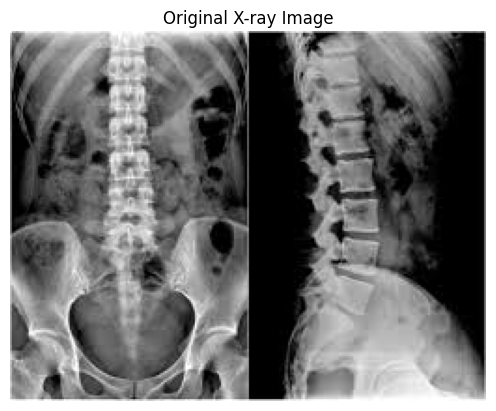

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the X-ray image (grayscale)
image = cv2.imread('image.jpg', 0)

# Display the image
plt.imshow(image, cmap='gray')
plt.title('Original X-ray Image')
plt.axis('off')
plt.show()


<b>Step 2: Perform Two-Level Wavelet Transform & Extracting Frequency Bands<b>

In [3]:
import pywt

# Perform a single-level 2D Discrete Wavelet Transform
coeffs1 = pywt.dwt2(image, 'haar')
LL1, (LH1, HL1, HH1) = coeffs1

# Perform a second-level decomposition on the LL1 band
coeffs2 = pywt.dwt2(LL1, 'haar')
LL2, (LH2, HL2, HH2) = coeffs2


Explanation:<br>
We perform a two-level Discrete Wavelet Transform (DWT) on the X-ray image using the Haar wavelet. The dwt2 function decomposes the image into different frequency bands at two levels.<br>
We extract the frequency bands from the wavelet coefficients obtained from the previous step:<br>

1. Level 1 Bands:<br>
LL1: Low-Low<br>
LH1: Low-High<br>
HL1: High-Low<br>
HH1: High-High<br>

2. Level 2 Bands:<br>
LL2: Low-Low<br>
LH2: Low-High<br>
HL2: High-Low<br>
HH2: High-High<br>
<br>

Interpretation:<br>
The wavelet transform allows us to analyze the image at multiple resolutions, capturing both coarse and fine details. The Haar wavelet is a simple and effective choice for initial analysis.<br>
Each band captures different frequency components of the image:<br>
LL captures the coarse details (low frequency).<br>
LH captures vertical edges (low frequency in horizontal, high in vertical).<br>
HL captures horizontal edges (high frequency in horizontal, low in vertical).<br>
HH captures fine details (high frequency in both directions).

<b>Step 3: Displaying Sub-Bands<b>

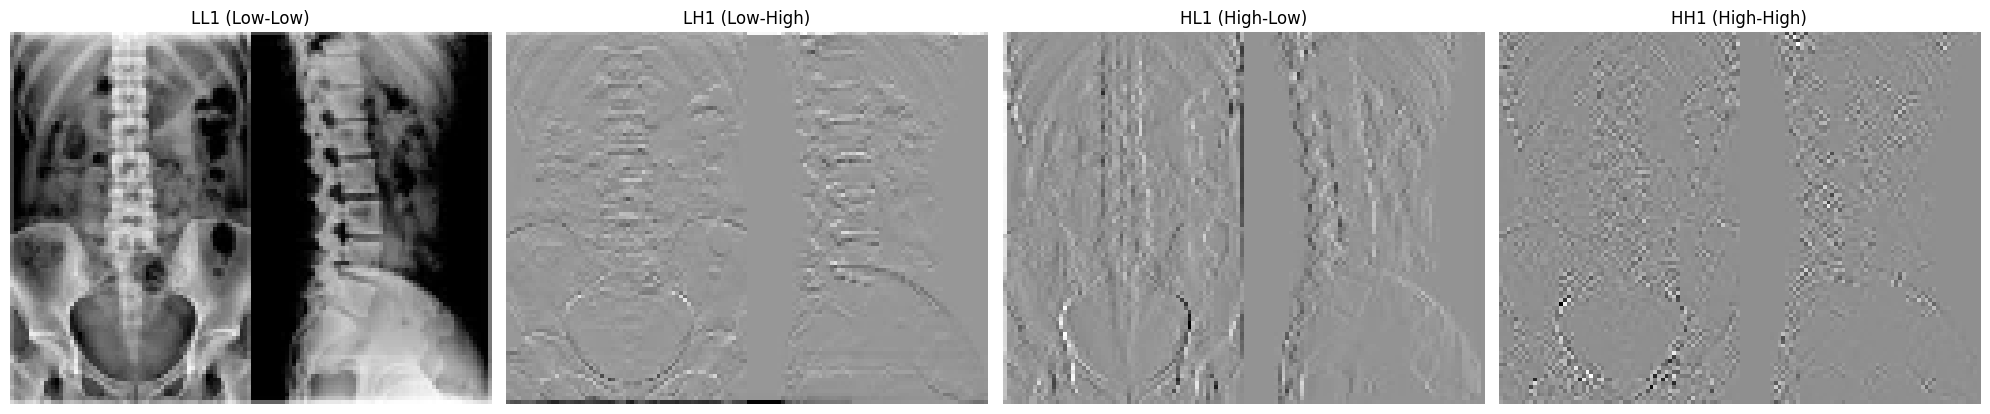

In [4]:
# Plot Level 1 sub-bands
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

titles = ['LL1 (Low-Low)', 'LH1 (Low-High)', 'HL1 (High-Low)', 'HH1 (High-High)']
images = [LL1, LH1, HL1, HH1]

for i, (img, title) in enumerate(zip(images, titles)):
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')

plt.tight_layout()
plt.show()


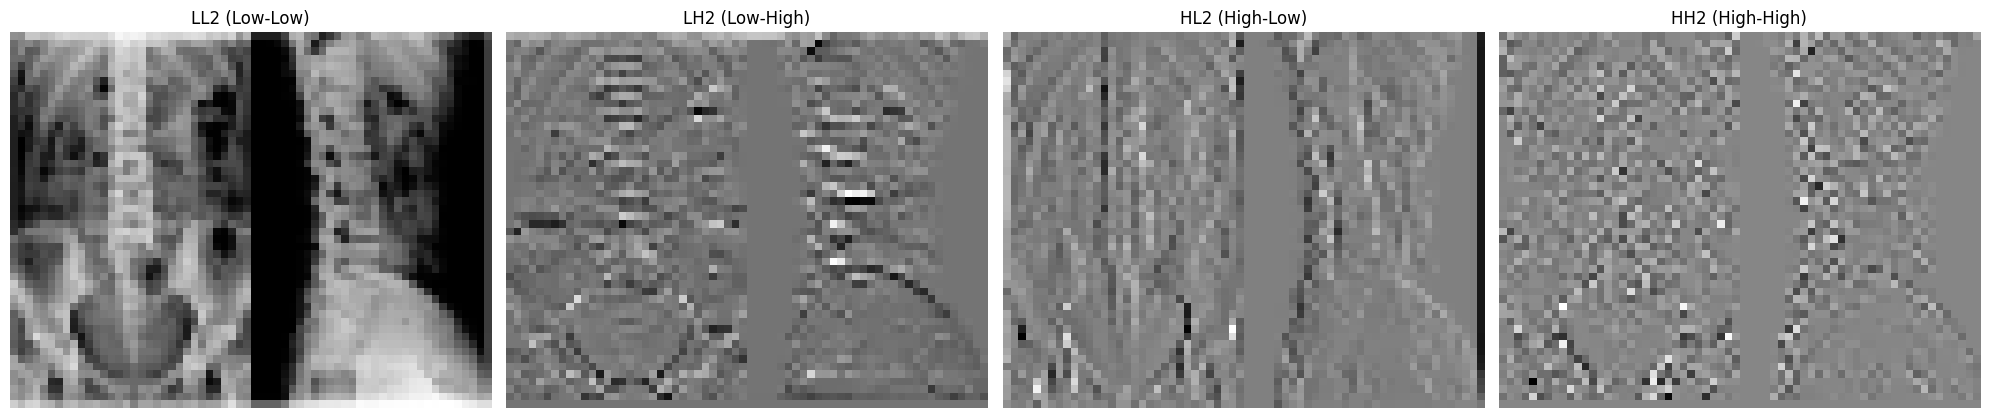

In [5]:
# Plot Level 2 sub-bands
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

titles = ['LL2 (Low-Low)', 'LH2 (Low-High)', 'HL2 (High-Low)', 'HH2 (High-High)']
images = [LL2, LH2, HL2, HH2]

for i, (img, title) in enumerate(zip(images, titles)):
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')

plt.tight_layout()
plt.show()


Explanation:<br>
We define a function plot_wavelet_bands to visualize the extracted frequency bands. It uses subplots to display each band in a grid format.<br>
We then call this function to display the Level 1 and Level 2 sub-bands.<br>
<br>
Interpretation:<br>
Each sub-band provides a unique view of the image’s frequency components:<br>
LL1 and LL2 show the overall structure and coarse details.<br>
LH1 and LH2 highlight vertical features and edges.<br>
HL1 and HL2 focus on horizontal features and edges.<br>
HH1 and HH2 capture fine noise and sharp edges, which are critical for detecting subtle details.<br>


<b>Step 4: Comaprison of Level 1 and Level 2 Frequency Bands<b>

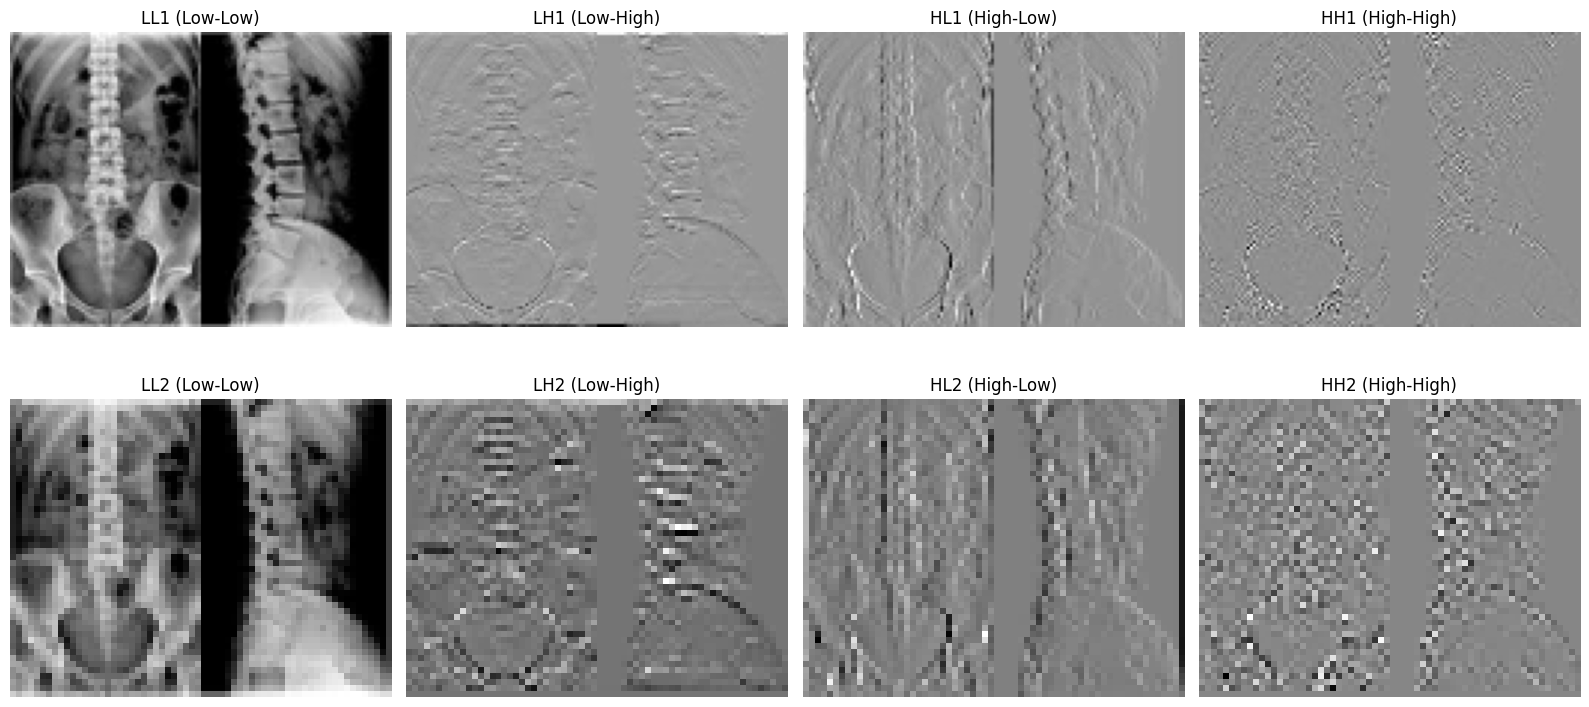

In [7]:
# Function to display and compare Level 1 and Level 2 frequency bands
def plot_comparison_LL_LH_HL_HH():
    plt.figure(figsize=(16, 8))
    
    # Level 1 Bands
    plt.subplot(2, 4, 1)
    plt.imshow(LL1, cmap='gray')
    plt.title('LL1 (Low-Low)')
    plt.axis('off')

    plt.subplot(2, 4, 2)
    plt.imshow(LH1, cmap='gray')
    plt.title('LH1 (Low-High)')
    plt.axis('off')

    plt.subplot(2, 4, 3)
    plt.imshow(HL1, cmap='gray')
    plt.title('HL1 (High-Low)')
    plt.axis('off')

    plt.subplot(2, 4, 4)
    plt.imshow(HH1, cmap='gray')
    plt.title('HH1 (High-High)')
    plt.axis('off')

    # Level 2 Bands
    plt.subplot(2, 4, 5)
    plt.imshow(LL2, cmap='gray')
    plt.title('LL2 (Low-Low)')
    plt.axis('off')

    plt.subplot(2, 4, 6)
    plt.imshow(LH2, cmap='gray')
    plt.title('LH2 (Low-High)')
    plt.axis('off')

    plt.subplot(2, 4, 7)
    plt.imshow(HL2, cmap='gray')
    plt.title('HL2 (High-Low)')
    plt.axis('off')

    plt.subplot(2, 4, 8)
    plt.imshow(HH2, cmap='gray')
    plt.title('HH2 (High-High)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Compare frequency bands for resolution variation
plot_comparison_LL_LH_HL_HH()


Explanation:<br>
We create a function compare_resolution_variation to visualize and analyze the differences in resolution between the LL1 and LL2 bands. The comparison helps to illustrate how increasing the level of decomposition affects the image details.<br>
<br>
Interpretation:<br>
The LL2 band provides a more refined view of the coarse details compared to LL1, allowing us to see more subtle features. This illustrates how wavelet decomposition can enhance the visibility of details in medical imaging.

<b>Step 5: Analyze Resolution Variation<b>

5.1. Comparing Resolution of Image

In [8]:
# Original image resolution
original_resolution = image.shape
print(f"Original Image Resolution: {original_resolution}")

# Level 1 resolution (LL1)
LL1_resolution = LL1.shape
print(f"Level 1 (LL1) Resolution: {LL1_resolution}")

# Level 2 resolution (LL2)
LL2_resolution = LL2.shape
print(f"Level 2 (LL2) Resolution: {LL2_resolution}")


Original Image Resolution: (198, 255)
Level 1 (LL1) Resolution: (99, 128)
Level 2 (LL2) Resolution: (50, 64)


Interpretation:<br>
The original image has the highest resolution.<br>
The LL1 image from Level 1 decomposition has almost half the resolution of the original image, meaning it captures the coarser details with less spatial resolution.<br>
The LL2 image from Level 2 decomposition has almost one-fourth the resolution of the original image, focusing on even coarser details and low-frequency information.

5.2. Comparing PSNR value

In [15]:
# Function to compute Mean Squared Error (MSE)
def mse(image1, image2):
    return np.mean((image1 - image2) ** 2)

# Function to compute PSNR
def psnr(original, compressed):
    mse_value = mse(original, compressed)
    if mse_value == 0:  # No noise, images are identical
        return float('inf')
    max_pixel = 255.0  # Assuming 8-bit grayscale images
    psnr_value = 10 * np.log10((max_pixel ** 2) / mse_value)
    return psnr_value

# Resizing LL1 and LL2 to the original image size for comparison
LL1_resized = cv2.resize(LL1, (original_resolution[1], original_resolution[0]))
LL2_resized = cv2.resize(LL2, (original_resolution[1], original_resolution[0]))

# Calculate PSNR between original image and LL1
psnr_LL1 = psnr(image, LL1_resized)
print(f"PSNR between Original Image and LL1: {psnr_LL1} dB")

# Calculate PSNR between original image and LL2
psnr_LL2 = psnr(image, LL2_resized)
print(f"PSNR between Original Image and LL2: {psnr_LL2} dB")

# Calculate PSNR between LL1 and LL2
LL1_resized_for_LL2 = cv2.resize(LL1, (LL2.shape[1], LL2.shape[0]))
psnr_LL1_LL2 = psnr(LL1_resized_for_LL2, LL2)
print(f"PSNR between LL1 and LL2: {psnr_LL1_LL2} dB")


PSNR between Original Image and LL1: 6.726547449749486 dB
PSNR between Original Image and LL2: -2.774212462726684 dB
PSNR between LL1 and LL2: 0.5590349567748575 dB


Peak Signal-to-Noise Ratio (PSNR) to assess the quality of the images at different decomposition levels. The PSNR is commonly used to measure the quality of an image compared to a reference image.<br> 
A higher PSNR value typically indicates better quality or less distortion.<br>
<br>
Interpretation of PSNR Results:<br>

1. Higher PSNR indicates less distortion between the original image and the wavelet decomposed image. In medical imaging, a higher PSNR implies better preservation of image quality.<br>
2. PSNR between LL1 and LL2 provides insight into the difference in quality between the two decomposition levels. A higher PSNR between LL1 and LL2 suggests that the quality loss between these two levels is minimal.


Conclusion:<br>
PSNR between Original Image and LL1 is low, indicating that LL1 doesnt preserves much of the image quality from the original image.<br>
PSNR between Original Image and LL2 is much lower, showing that LL2 has more degradation compared to the original image due to the increased decomposition.<br>
PSNR between LL1 and LL2 highlights the quality loss between the two levels, where a moderate decrease in PSNR shows that LL2 has finer decomposition but with more noise or loss of details compared to LL1.